In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
# 🔹 Load the CSV dataset
df = pd.read_csv('diabetes.csv')  # Replace with your actual file path

# 🔹 Split into features (X) and labels (Y)
X = df.drop(columns=['Outcome']).values  # Assuming 'Outcome' is the target column
Y = df['Outcome'].values  # Binary labels (0 or 1)

In [5]:
# 🔹 Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 🔹 Split into training and testing sets (80% train, 20% test)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [6]:
# 🔹 Define a Neural Network Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(Xtrain.shape[1],)), #First layer with 16 neurons
    Dropout(0.3),  # Prevent overfitting
    Dense(8, activation='relu'), # layer with 8 neurons
    Dense(1, activation='sigmoid')  # Binary classification output
])

# 🔹 Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# 🔹 Train the model
history = model.fit(Xtrain, Ytrain, epochs=50, batch_size=100, validation_data=(Xtest, Ytest))

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.4847 - loss: 0.7716 - val_accuracy: 0.5130 - val_loss: 0.7279
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5008 - loss: 0.7621 - val_accuracy: 0.5519 - val_loss: 0.7055
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5500 - loss: 0.7245 - val_accuracy: 0.5649 - val_loss: 0.6875
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5345 - loss: 0.7116 - val_accuracy: 0.5779 - val_loss: 0.6722
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5532 - loss: 0.6989 - val_accuracy: 0.6039 - val_loss: 0.6587
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5843 - loss: 0.6827 - val_accuracy: 0.6234 - val_loss: 0.6473
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6098 - loss: 0.6470 - val_accuracy: 0.6299 - val_loss: 0.6377
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6183 - loss: 0.6368 - val_accuracy: 0.6494 - val_loss: 0.6287


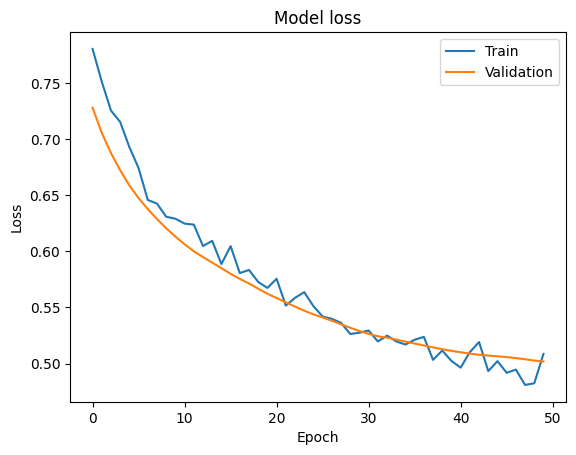

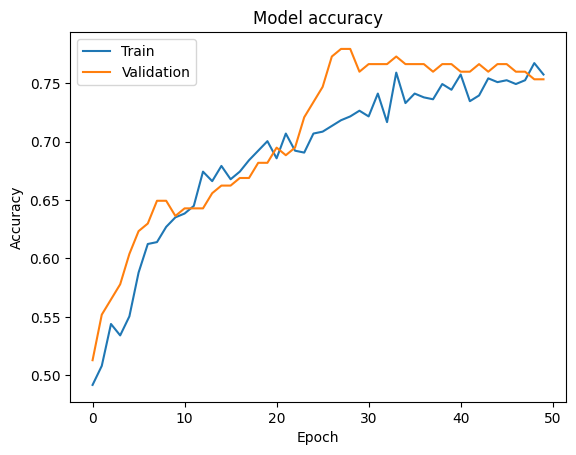

In [8]:
import matplotlib.pyplot as plt

# ... (your model training code) ...

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()